In [165]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
boston = load_boston()
X, y = load_boston(return_X_y=True)

In [166]:
import pandas as pd
# Visualize the data as a DataFrame for sanity checking
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def generate_regression_data(feature=None):
    X, y = load_boston(return_X_y=True)
    # feature=None corresponds to calculating data for all features
    if feature:
        feature = int(feature)
        X = X[:,feature:feature+1]
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)
    reg = LinearRegression().fit(x_train,y_train)
    prediction = reg.predict(x_test)
    coefficients = reg.coef_
    mse = np.mean((prediction, y_test))
    variance = reg.score(x_test, y_test)
    data = dict(
        feature=X,
        regression=reg,
        prediction=prediction,
        coefficients=coefficients,
        mse=mse,
        variance=variance,
        x_test=x_test,
        x_train=x_train,
        y_test=y_test,
        y_train=y_train,
    )
    return data

def print_data(data):
    print('Coefficients: \n {}'.format(data['coefficients']))
    print('Mean Squared Error: \n{}'.format(data['mse']))
    print('Variance score: \n{}'.format(data['variance']))
    
def plot_data(data):
    plt.scatter(data['x_test'], data['y_test'], color='green', label='Test Data')
    plt.scatter(data['x_train'], data['y_train'], color='orange', label='Training Data')
    plt.plot(data['x_test'], data['prediction'], color='blue')
    return plt

#### Part 2(b): Report data based on linear regression with all 13 features

In [168]:
data = generate_regression_data()
print_data(data)

Coefficients: 
 [-1.30607159e-01  4.41763510e-02  4.87845670e-03  2.56003556e+00
 -1.76863655e+01  3.54921956e+00 -3.04456297e-03 -1.59546212e+00
  3.15217048e-01 -1.08678200e-02 -9.69996870e-01  8.82413730e-03
 -5.59934005e-01]
Mean Squared Error: 
22.3526696597152
Variance score: 
0.8349587908141975


#### Part 3(b): Data and plots for each of the 13 features separately

Data for feature CRIM
Coefficients: 
 [-0.45670453]
Mean Squared Error: 
22.015123529367443
Variance score: 
0.1388861578871401


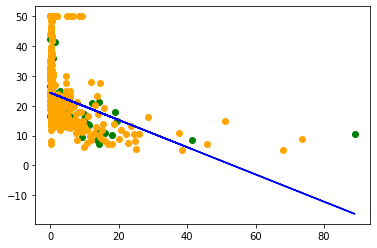

Data for feature ZN
Coefficients: 
 [0.14594771]
Mean Squared Error: 
22.473894687504043
Variance score: 
0.08228318013078972


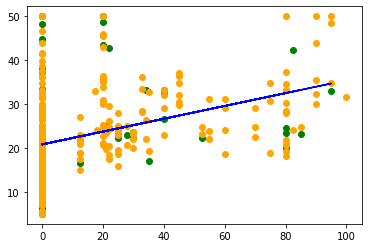

Data for feature INDUS
Coefficients: 
 [-0.63425589]
Mean Squared Error: 
23.31572780012214
Variance score: 
0.25173289418387945


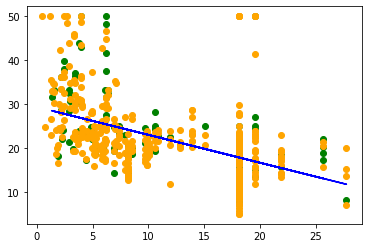

Data for feature CHAS
Coefficients: 
 [5.40763158]
Mean Squared Error: 
23.35836042311662
Variance score: 
0.008640360829474725


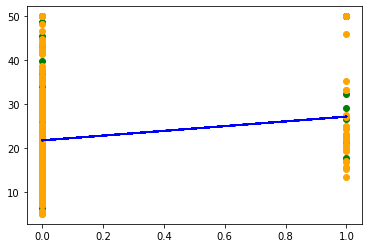

Data for feature NOX
Coefficients: 
 [-33.91939165]
Mean Squared Error: 
21.836365975419735
Variance score: 
0.22315362969632546


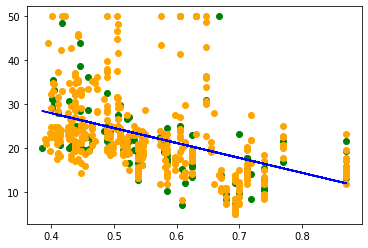

Data for feature RM
Coefficients: 
 [8.96016626]
Mean Squared Error: 
22.165876034651195
Variance score: 
0.5746084182078652


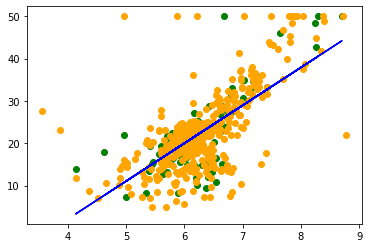

Data for feature AGE
Coefficients: 
 [-0.12304519]
Mean Squared Error: 
21.983270543728395
Variance score: 
0.1231876340610033


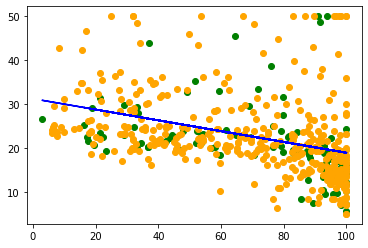

Data for feature DIS
Coefficients: 
 [1.07397537]
Mean Squared Error: 
22.8836256706169
Variance score: 
0.0701595250091065


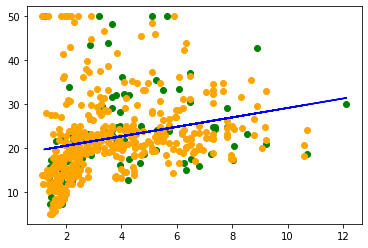

Data for feature RAD
Coefficients: 
 [-0.37726398]
Mean Squared Error: 
22.161833901230374
Variance score: 
0.23612720994308345


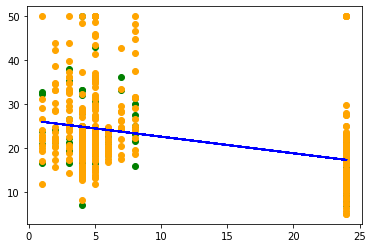

Data for feature TAX
Coefficients: 
 [-0.0239041]
Mean Squared Error: 
21.725535701294174
Variance score: 
0.40324486443087393


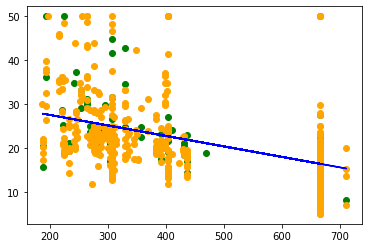

Data for feature PTRATIO
Coefficients: 
 [-2.31946964]
Mean Squared Error: 
22.41789498090919
Variance score: 
0.09271388731219699


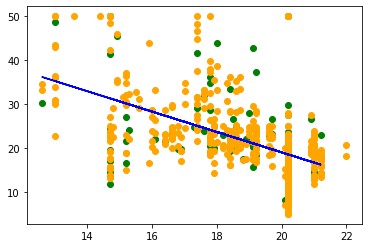

Data for feature B
Coefficients: 
 [0.03251538]
Mean Squared Error: 
22.048577720994917
Variance score: 
0.2053179185322469


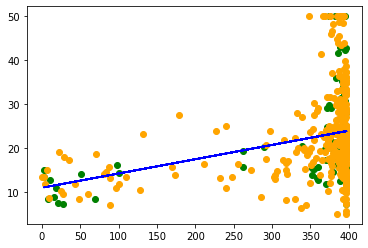

Data for feature LSTAT
Coefficients: 
 [-0.93716079]
Mean Squared Error: 
22.140537425501112
Variance score: 
0.519613971968019


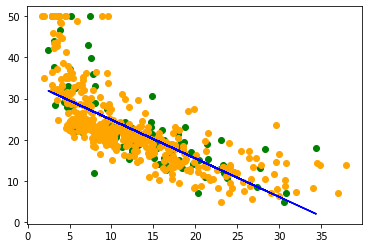

In [169]:
# Use strings because passing 0 (the int) to generate_regression_data causes a bug
feature_strings = [str(i) for i in range(13)]
for idx, feature_string in enumerate(feature_strings):
    print("Data for feature {}".format(boston.feature_names[idx]))
    data = generate_regression_data(feature=feature_string)
    print_data(data)
    plot = plot_data(data)
    plot.show()

#### Part 4(b): Calculate regression data 10x for each feature individually as well as all features simultaneously

In [170]:
def generate_average_data(feature=None):
    """
    feature=None corresponds to calculating data for all features simultaneously
    Calculate regression data for a feature (or all features) 10 times
    and return the average 
    """
    data_list = []
    for i in range(10):
        data = generate_regression_data(feature)
        data_list.append(data)
    average_data = {}
    average_data['mse'] = sum(d['mse'] for d in data_list)/len(data_list)
    average_data['variance'] = sum(d['variance'] for d in data_list)/len(data_list)
    # These indices are a bit wonkey. Feature 1 is actually the 0th column in the data
    # and we want Feature 0 to represent all features together
    if feature:
        average_data['feature'] = int(feature) + 1
    else:
        average_data['feature'] = 0
    return average_data

feature_strings = [None] + [str(i) for i in range(13)]
feature_data = [generate_average_data(feature_string) for feature_string in feature_strings]

#### 3(b)

Text(0, 0.5, 'Mean Square Error')

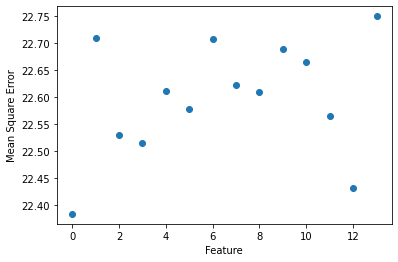

In [171]:
# Plot MSE vs features
x_axis = [data['feature'] for data in feature_data]
y_axis = [data['mse'] for data in feature_data]
plt.scatter(x_axis, y_axis)
plt.xlabel('Feature')
plt.ylabel('Mean Square Error')

Text(0, 0.5, 'Variance')

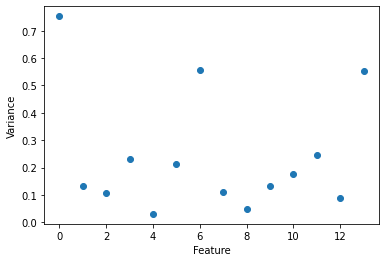

In [172]:
# Plot Variance vs features
x_axis = [data['feature'] for data in feature_data]
y_axis = [data['variance'] for data in feature_data]
plt.scatter(x_axis, y_axis)
plt.xlabel('Feature')
plt.ylabel('Variance')

#### Based upon the linear models you generated, which feature appears to be most predictive for the target feature?
LSTAT has the highest variance of all the features, which indicates that, by that metric, it is the most predictive feature. Stepping away from the data, it makes sense that this feature would be predictive, as people of lower socioeconomic status necessarily tend to live in areas with lower home values. Looking at the plot for that feature, it appears that the regression generated fits the training and testing data well.

#### Which two features would you select for a linear regression model to predict the target feature?
Following the logic from the previous question, I would certainly choose LSTAT. The feature with the next highest variance is RM. Again, logically it makes sense that homes with more rooms (which necessarily correlates with increased square footage) would have higher values. Looking at the plot for the RM feature, it appears that the regression generated first the training and testing data well. 

Again, stepping away from the data, it makes sense that the combination of how large a house is and the average socioeconomic status of people who live in the neighborhood would be strong predictors of home value.

#### Is there anything surprising/noteworthy about the data?
CRIM: While it does seem generally true that high crime equates to low home values, there are house values from less than then thousand dollars up to fifty thousand dollars in towns that have a crime rate of 0, which is a bit surprising. This unexpected data comes out in the variance score for this feature, which is much lower than I would expect. 

INDUS: This is an interesting metric. It does seem loosely true that more industrial zoning causes home values to decrease, but the variance is very low. I think in order for this metric to be useful, it needs to be more specific. For example, if you think about a city like Chelsea that has a lot of land used for industrial purposes that bring more blue collar jobs vs a city like Needham that has a lot of land used for industrial purposes that bring more white collar jobs. I think the categorization of "Industrial" is too vague.

AGE: I think in some cities, this feature would be a stronger predictor. But in Boston, many buildings are very old, and many residents value classic architecture. But, for example, in Kansas City where I am from, people with more money tend to prefer to live in newer suburbs, and older homes are not as sought after

DIS: There is a large cluster of homes that have a low DIS score (meaning they are close to employment centers) but also low home values. This is not surprising to me, because again, if you think of cities like Chelsea or neighborhoods like Roxbury that, historically have not been seen as sought-after neighborhoods, even though they are very close to downtown Boston. Of course this has changed dramatically in the past few decades, but based on the laughable maximum home price of $50,000, I'm guessing this data is quite old.

